In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Загрузка данных
X, y = data, target

# Разделение данных на три части
X_small, X_rest, y_small, y_rest = train_test_split(X, y, test_size=0.9, random_state=42)
X_medium, X_large, y_medium, y_large = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

# Создание моделей
model_small = LinearRegression().fit(X_small, y_small)
model_medium = LinearRegression().fit(X_medium, y_medium)
model_large = LinearRegression().fit(X_large, y_large)

# Оценка моделей
for model in [model_small, model_medium, model_large]:
    y_pred = model.predict(X)
    print('MSE:', mean_squared_error(y, y_pred))
    print('MAE:', mean_absolute_error(y, y_pred))
    print('R^2:', r2_score(y, y_pred))


MSE: 27.20848602887935
MAE: 3.682170994299789
R^2: 0.6776992527827667
MSE: 22.582392143764594
MAE: 3.375720179852336
R^2: 0.7324980943753127
MSE: 22.896665516816586
MAE: 3.308744416060598
R^2: 0.7287753388034801


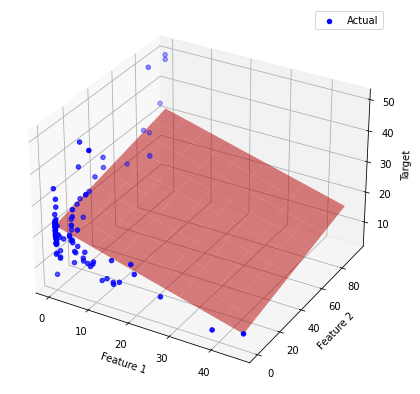

In [7]:
from mpl_toolkits.mplot3d import Axes3D
# Выберите два признака для анализа
X = X[:, :2]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений для тестовой выборки
y_pred = model.predict(X_test)

# Визуализация данных
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Отрисовка исходных данных
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='b')

# Отрисовка плоскости решения
x0 = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), num=10)
x1 = np.linspace(min(X_test[:, 1]), max(X_test[:, 1]), num=10)
x0, x1 = np.meshgrid(x0, x1)
Z = model.intercept_ + model.coef_[0] * x0 + model.coef_[1] * x1
ax.plot_surface(x0, x1, Z, color='r', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')
ax.legend([scatter], ['Actual'])
plt.show()